# Sleepmeter non-24 circadian rhythm disorder single-case analysis

Notebook to analyze the sleep log data of a single case of non-24 circadian rhythm disorder, acquired with Sleepmeter on Android.

By Stephen Karl Larroque (2020)

Licensed under MIT

Still a work in progress

In [318]:
# Forcefully autoreload all python modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from io import StringIO
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [320]:
# PARAMETERS - EDIT ME
csvpath = r'sleep_history_2020-03-14.1.csv'  # path to the exported sleep log data (from Sleepmeter menu, select Manage Databases and then send the csv to your email)


## Load and cleaning sleep log data

In [319]:
def load_csv_multi_tables(filepath):
    """Load a csv containing multiple tables into multiple pandas DataFrames"""
    # From: https://stackoverflow.com/questions/36904691/pd-read-csv-multiple-tables-and-parse-data-frames-using-index-0
    
    # Load the csv and detect when there is a space, then split into a virtual file
    subfiles = [StringIO()]
    with open(filepath) as bigfile:
        for line in bigfile:
            if line.strip() == "": # blank line, new subfile                                                                                                                                       
                subfiles.append(StringIO())
            else: # continuation of same subfile                                                                                                                                                   
                subfiles[-1].write(line)

    # For each virtual file, load up as a csv in a pandas DataFrame
    tables = []
    for subfile in subfiles:
        subfile.seek(0)
        tables.append(pd.read_csv(subfile, sep=','))
    return tables

In [321]:
tables = load_csv_multi_tables(csvpath)

In [322]:
# Load the main sleep log table and convert some columns to datetime objects, will ease time difference calculations
sleeplog = tables[3] #.set_index(tables[3].columns[0])
#sleeplog.index = pd.to_datetime(sleeplog.index)
sleeplog['wake'] = pd.to_datetime(sleeplog['wake'], utc=True)
sleeplog['sleep'] = pd.to_datetime(sleeplog['sleep'], utc=True)
sleeplog['bedtime'] = pd.to_datetime(sleeplog['bedtime'], utc=True)
sleeplog

,wake,sleep,bedtime,holes,type,dreams,aid,hindrances,tags,quality,notes
0,2020-03-14 10:09:00+00:00,2020-03-14 02:06:00+00:00,2020-03-14 01:51:00+00:00,128-160,NIGHT_SLEEP,NONE,CUSTOM_0006|CUSTOM_0011|CUSTOM_0013|CUSTOM_0005,CUSTOM_0001|CUSTOM_0013,CUSTOM_0001|CUSTOM_0012|CUSTOM_0011,5,"Big meal at 19h00, was late because of errands..."
1,2020-03-13 09:32:00+00:00,2020-03-13 03:16:00+00:00,2020-03-13 03:01:00+00:00,NaN,NIGHT_SLEEP,NONE,CUSTOM_0006|CUSTOM_0011|CUSTOM_0013|CUSTOM_0005,CUSTOM_0001|CUSTOM_0002|CUSTOM_0018|CUSTOM_001...,COUCH|CUSTOM_0001|CUSTOM_0012|CUSTOM_0011,6,"No big meal because of argument all day, ate s..."
2,2020-03-12 09:52:00+00:00,2020-03-12 03:57:00+00:00,2020-03-12 03:42:00+00:00,NaN,NIGHT_SLEEP,NONE,CUSTOM_0006|CUSTOM_0013|CUSTOM_0005|CUSTOM_0014,CUSTOM_0012|CUSTOM_0022|CUSTOM_0016|CUSTOM_0010,CUSTOM_0001|CUSTOM_0012,5,"Ate at 17h15, melatonin at 20h30."
3,2020-03-11 12:05:00+00:00,2020-03-11 10:25:00+00:00,2020-03-11 10:09:00+00:00,NaN,NAP,NIGHTMARE:-3,NONE,CUSTOM_0022|CUSTOM_0016,NONE,3,NaN
4,2020-03-11 07:20:00+00:00,2020-03-11 00:01:00+00:00,2020-03-10 23:46:00+00:00,359-364,NIGHT_SLEEP,NIGHTMARE:-4,CUSTOM_0006|CUSTOM_0013|CUSTOM_0005|CUSTOM_0014,NONE,CUSTOM_0001|CUSTOM_0012,6,"Ate at 17h00, melatonin at 20h30. Woke up beca..."
5,2020-03-10 06:50:00+00:00,2020-03-10 00:05:00+00:00,2020-03-09 23:50:00+00:00,295-305,NIGHT_SLEEP,NONE,CUSTOM_0006|CUSTOM_0011|CUSTOM_0013|CUSTOM_000...,CUSTOM_0007,COUCH|CUSTOM_0001|CUSTOM_0012,5,"Ate at 17h15, melatonin at 20h30. Woke up depr..."
6,2020-03-09 07:03:00+00:00,2020-03-09 00:27:00+00:00,2020-03-09 00:12:00+00:00,NaN,NIGHT_SLEEP,NONE,CUSTOM_0006|CUSTOM_0013|CUSTOM_0005,ALARM_CLOCK|CUSTOM_0002|CUSTOM_0018|CUSTOM_0020,CUSTOM_0001|CUSTOM_0011,6,"No big timed meal, stopped eating at 19h00 bef..."
7,2020-03-08 08:30:00+00:00,2020-03-08 01:24:00+00:00,2020-03-08 01:09:00+00:00,356-396,NIGHT_SLEEP,NONE,CUSTOM_0006|CUSTOM_0012|CUSTOM_0011|CUSTOM_001...,NONE,CUSTOM_0001|CUSTOM_0012,5,NaN
8,2020-03-07 09:29:00+00:00,2020-03-07 02:50:00+00:00,2020-03-07 02:25:00+00:00,179-217,NIGHT_SLEEP,NONE,CUSTOM_0006|CUSTOM_0002|CUSTOM_0013|CUSTOM_000...,ALARM_CLOCK|CUSTOM_0002|CUSTOM_0020,CUSTOM_0001|CUSTOM_0012,5,"Ate at 16h50, melatonin at 20h15"
9,2020-03-06 11:41:00+00:00,2020-03-06 09:06:00+00:00,2020-03-06 08:51:00+00:00,NaN,NAP,NONE,NONE,NONE,NONE,5,NaN


In [323]:
# Calculate sleep duration
sleeplog['duration'] = sleeplog['wake'] - sleeplog['sleep']
# Reorder columns
sleeplog = sleeplog[['bedtime', 'sleep', 'wake', 'duration'] + list(sleeplog.columns[3:-1])]
sleeplog

,bedtime,sleep,wake,duration,holes,type,dreams,aid,hindrances,tags,quality,notes
0,2020-03-14 01:51:00+00:00,2020-03-14 02:06:00+00:00,2020-03-14 10:09:00+00:00,08:03:00,128-160,NIGHT_SLEEP,NONE,CUSTOM_0006|CUSTOM_0011|CUSTOM_0013|CUSTOM_0005,CUSTOM_0001|CUSTOM_0013,CUSTOM_0001|CUSTOM_0012|CUSTOM_0011,5,"Big meal at 19h00, was late because of errands..."
1,2020-03-13 03:01:00+00:00,2020-03-13 03:16:00+00:00,2020-03-13 09:32:00+00:00,06:16:00,NaN,NIGHT_SLEEP,NONE,CUSTOM_0006|CUSTOM_0011|CUSTOM_0013|CUSTOM_0005,CUSTOM_0001|CUSTOM_0002|CUSTOM_0018|CUSTOM_001...,COUCH|CUSTOM_0001|CUSTOM_0012|CUSTOM_0011,6,"No big meal because of argument all day, ate s..."
2,2020-03-12 03:42:00+00:00,2020-03-12 03:57:00+00:00,2020-03-12 09:52:00+00:00,05:55:00,NaN,NIGHT_SLEEP,NONE,CUSTOM_0006|CUSTOM_0013|CUSTOM_0005|CUSTOM_0014,CUSTOM_0012|CUSTOM_0022|CUSTOM_0016|CUSTOM_0010,CUSTOM_0001|CUSTOM_0012,5,"Ate at 17h15, melatonin at 20h30."
3,2020-03-11 10:09:00+00:00,2020-03-11 10:25:00+00:00,2020-03-11 12:05:00+00:00,01:40:00,NaN,NAP,NIGHTMARE:-3,NONE,CUSTOM_0022|CUSTOM_0016,NONE,3,NaN
4,2020-03-10 23:46:00+00:00,2020-03-11 00:01:00+00:00,2020-03-11 07:20:00+00:00,07:19:00,359-364,NIGHT_SLEEP,NIGHTMARE:-4,CUSTOM_0006|CUSTOM_0013|CUSTOM_0005|CUSTOM_0014,NONE,CUSTOM_0001|CUSTOM_0012,6,"Ate at 17h00, melatonin at 20h30. Woke up beca..."
5,2020-03-09 23:50:00+00:00,2020-03-10 00:05:00+00:00,2020-03-10 06:50:00+00:00,06:45:00,295-305,NIGHT_SLEEP,NONE,CUSTOM_0006|CUSTOM_0011|CUSTOM_0013|CUSTOM_000...,CUSTOM_0007,COUCH|CUSTOM_0001|CUSTOM_0012,5,"Ate at 17h15, melatonin at 20h30. Woke up depr..."
6,2020-03-09 00:12:00+00:00,2020-03-09 00:27:00+00:00,2020-03-09 07:03:00+00:00,06:36:00,NaN,NIGHT_SLEEP,NONE,CUSTOM_0006|CUSTOM_0013|CUSTOM_0005,ALARM_CLOCK|CUSTOM_0002|CUSTOM_0018|CUSTOM_0020,CUSTOM_0001|CUSTOM_0011,6,"No big timed meal, stopped eating at 19h00 bef..."
7,2020-03-08 01:09:00+00:00,2020-03-08 01:24:00+00:00,2020-03-08 08:30:00+00:00,07:06:00,356-396,NIGHT_SLEEP,NONE,CUSTOM_0006|CUSTOM_0012|CUSTOM_0011|CUSTOM_001...,NONE,CUSTOM_0001|CUSTOM_0012,5,NaN
8,2020-03-07 02:25:00+00:00,2020-03-07 02:50:00+00:00,2020-03-07 09:29:00+00:00,06:39:00,179-217,NIGHT_SLEEP,NONE,CUSTOM_0006|CUSTOM_0002|CUSTOM_0013|CUSTOM_000...,ALARM_CLOCK|CUSTOM_0002|CUSTOM_0020,CUSTOM_0001|CUSTOM_0012,5,"Ate at 16h50, melatonin at 20h15"
9,2020-03-06 08:51:00+00:00,2020-03-06 09:06:00+00:00,2020-03-06 11:41:00+00:00,02:35:00,NaN,NAP,NONE,NONE,NONE,NONE,5,NaN


In [347]:
# Detect naps that were wrongly typed as night sleeps

nightsleepmin = {'hours': 4, 'minutes': 35}  # minimum duration in hours to consider a sleep night, any shorter sleep will be considered a nap
napdiff_threshold = {'hours': 7}  # in datetime.timedelta() format

def detect_naps(sleeplog_in, nightsleepmin=None, napdiff_threshold=None):
    """Detect naps based on timing and duration
    This is very important to remove outliers that will mess up the calculation of longitudinal wake up time difference (because if a nap is wrongly typed, then the wake up time of the nap will interfere between 2 real night sleeps!)"""
    sleeplog = sleeplog_in.copy()
    # Copy the type column
    sleeplog.loc[:, 'type_cleaned'] = sleeplog.loc[:, 'type']
    # NAP DETECTED BY SHORT DURATION
    if nightsleepmin is not None:
        sleeplog.loc[sleeplog['duration'] < datetime.timedelta(**nightsleepmin), 'type_cleaned'] = 'NAP'
    # NAP DETECTED BY TIME DIFFERENCE
    if napdiff_threshold is not None:
        for idx in sleeplog.index[:-1]:
            if (
                not (sleeplog.loc[idx, 'type'] == 'NAP' or sleeplog.loc[idx+1, 'type'] == 'NAP')  # check if neither is a nap, then we check the time difference
                and (sleeplog.loc[idx, 'sleep'] - sleeplog.loc[idx+1, 'wake'] < datetime.timedelta(**napdiff_threshold))  # check if the difference between the previous sleep wake up time and next asleep time is under the threshold (ie, only a few hours between the last wake up and the next asleep state, one of them is likely a nap)
               ):
                # NAP DETECTED BY TIME DIFFERENCE
                # We now have to select which one is a nap, we select the one with the smallest duration (TODO: we could find another more precise way to infer?)
                if sleeplog.loc[idx, 'duration'] < sleeplog.loc[idx+1, 'duration']:
                    sleeplog.loc[idx, 'type_cleaned'] = 'NAP'
                elif sleeplog.loc[idx, 'duration'] > sleeplog.loc[idx+1, 'duration']:
                    sleeplog.loc[idx+1, 'type_cleaned'] = 'NAP'
                else:
                    sleeplog.loc[idx, 'type_cleaned'] = 'NAP'
                    sleeplog.loc[idx+1, 'type_cleaned'] = 'NAP'
    return sleeplog

sleeplog_napsfixed = detect_naps(sleeplog, nightsleepmin, napdiff_threshold)
sleeplog_napsfixed

,bedtime,sleep,wake,duration,holes,type,dreams,aid,hindrances,tags,quality,notes,type_cleaned
0,2020-03-14 01:51:00+00:00,2020-03-14 02:06:00+00:00,2020-03-14 10:09:00+00:00,08:03:00,128-160,NIGHT_SLEEP,NONE,CUSTOM_0006|CUSTOM_0011|CUSTOM_0013|CUSTOM_0005,CUSTOM_0001|CUSTOM_0013,CUSTOM_0001|CUSTOM_0012|CUSTOM_0011,5,"Big meal at 19h00, was late because of errands...",NIGHT_SLEEP
1,2020-03-13 03:01:00+00:00,2020-03-13 03:16:00+00:00,2020-03-13 09:32:00+00:00,06:16:00,NaN,NIGHT_SLEEP,NONE,CUSTOM_0006|CUSTOM_0011|CUSTOM_0013|CUSTOM_0005,CUSTOM_0001|CUSTOM_0002|CUSTOM_0018|CUSTOM_001...,COUCH|CUSTOM_0001|CUSTOM_0012|CUSTOM_0011,6,"No big meal because of argument all day, ate s...",NIGHT_SLEEP
2,2020-03-12 03:42:00+00:00,2020-03-12 03:57:00+00:00,2020-03-12 09:52:00+00:00,05:55:00,NaN,NIGHT_SLEEP,NONE,CUSTOM_0006|CUSTOM_0013|CUSTOM_0005|CUSTOM_0014,CUSTOM_0012|CUSTOM_0022|CUSTOM_0016|CUSTOM_0010,CUSTOM_0001|CUSTOM_0012,5,"Ate at 17h15, melatonin at 20h30.",NIGHT_SLEEP
3,2020-03-11 10:09:00+00:00,2020-03-11 10:25:00+00:00,2020-03-11 12:05:00+00:00,01:40:00,NaN,NAP,NIGHTMARE:-3,NONE,CUSTOM_0022|CUSTOM_0016,NONE,3,NaN,NAP
4,2020-03-10 23:46:00+00:00,2020-03-11 00:01:00+00:00,2020-03-11 07:20:00+00:00,07:19:00,359-364,NIGHT_SLEEP,NIGHTMARE:-4,CUSTOM_0006|CUSTOM_0013|CUSTOM_0005|CUSTOM_0014,NONE,CUSTOM_0001|CUSTOM_0012,6,"Ate at 17h00, melatonin at 20h30. Woke up beca...",NIGHT_SLEEP
5,2020-03-09 23:50:00+00:00,2020-03-10 00:05:00+00:00,2020-03-10 06:50:00+00:00,06:45:00,295-305,NIGHT_SLEEP,NONE,CUSTOM_0006|CUSTOM_0011|CUSTOM_0013|CUSTOM_000...,CUSTOM_0007,COUCH|CUSTOM_0001|CUSTOM_0012,5,"Ate at 17h15, melatonin at 20h30. Woke up depr...",NIGHT_SLEEP
6,2020-03-09 00:12:00+00:00,2020-03-09 00:27:00+00:00,2020-03-09 07:03:00+00:00,06:36:00,NaN,NIGHT_SLEEP,NONE,CUSTOM_0006|CUSTOM_0013|CUSTOM_0005,ALARM_CLOCK|CUSTOM_0002|CUSTOM_0018|CUSTOM_0020,CUSTOM_0001|CUSTOM_0011,6,"No big timed meal, stopped eating at 19h00 bef...",NIGHT_SLEEP
7,2020-03-08 01:09:00+00:00,2020-03-08 01:24:00+00:00,2020-03-08 08:30:00+00:00,07:06:00,356-396,NIGHT_SLEEP,NONE,CUSTOM_0006|CUSTOM_0012|CUSTOM_0011|CUSTOM_001...,NONE,CUSTOM_0001|CUSTOM_0012,5,NaN,NIGHT_SLEEP
8,2020-03-07 02:25:00+00:00,2020-03-07 02:50:00+00:00,2020-03-07 09:29:00+00:00,06:39:00,179-217,NIGHT_SLEEP,NONE,CUSTOM_0006|CUSTOM_0002|CUSTOM_0013|CUSTOM_000...,ALARM_CLOCK|CUSTOM_0002|CUSTOM_0020,CUSTOM_0001|CUSTOM_0012,5,"Ate at 16h50, melatonin at 20h15",NIGHT_SLEEP
9,2020-03-06 08:51:00+00:00,2020-03-06 09:06:00+00:00,2020-03-06 11:41:00+00:00,02:35:00,NaN,NAP,NONE,NONE,NONE,NONE,5,NaN,NAP


In [348]:
# Show sleep log where nap was fixed
sleeplog_napsfixed[sleeplog_napsfixed['type'] != sleeplog_napsfixed['type_cleaned']]

,bedtime,sleep,wake,duration,holes,type,dreams,aid,hindrances,tags,quality,notes,type_cleaned
42,2020-02-07 22:53:00+00:00,2020-02-07 23:08:00+00:00,2020-02-08 02:51:00+00:00,03:43:00,NaN,NIGHT_SLEEP,NONE,NONE,CUSTOM_0018|CUSTOM_0004,CUSTOM_0001|CUSTOM_0004|CUSTOM_0010,5,NaN,NAP
50,2020-02-01 16:46:00+00:00,2020-02-01 17:01:00+00:00,2020-02-01 21:01:00+00:00,04:00:00,115-139,NIGHT_SLEEP,NONE,CUSTOM_0006|CUSTOM_0001|CUSTOM_0002,CUSTOM_0001|CUSTOM_0012|CUSTOM_0010|CUSTOM_0007,CUSTOM_0008|CUSTOM_0007|CUSTOM_0005|CUSTOM_0010,4,NaN,NAP
54,2020-01-30 14:50:00+00:00,2020-01-30 15:05:00+00:00,2020-01-30 17:15:00+00:00,02:10:00,NaN,NIGHT_SLEEP,NONE,NONE,ALARM_CLOCK|CUSTOM_0017|CUSTOM_0010|CUSTOM_000...,OUT_OF_TOWN|SLEPT_IN_CAR,5,NaN,NAP
64,2020-01-23 06:36:00+00:00,2020-01-23 06:51:00+00:00,2020-01-23 10:40:00+00:00,03:49:00,159-189,NIGHT_SLEEP,NONE,CUSTOM_0006|CUSTOM_0007|CUSTOM_0002,ALARM_CLOCK|CUSTOM_0001,CUSTOM_0001|CUSTOM_0007|CUSTOM_0005,3,NaN,NAP
87,2020-01-04 19:19:00+00:00,2020-01-04 19:30:00+00:00,2020-01-04 23:20:00+00:00,03:50:00,NaN,NIGHT_SLEEP,NONE,CUSTOM_0006|CUSTOM_0001|CUSTOM_0002,CUSTOM_0002|CUSTOM_0013|CUSTOM_0010|CUSTOM_0015,NONE,5,NaN,NAP
95,2019-12-30 17:27:00+00:00,2019-12-30 17:42:00+00:00,2019-12-30 21:22:00+00:00,03:40:00,NaN,NIGHT_SLEEP,NONE,CUSTOM_0006|CUSTOM_0001|CUSTOM_0007|CUSTOM_0002,CUSTOM_0002|CUSTOM_0012|CUSTOM_0015,NONE,6,NaN,NAP
98,2019-12-28 16:49:00+00:00,2019-12-28 16:55:00+00:00,2019-12-28 20:55:00+00:00,04:00:00,NaN,NIGHT_SLEEP,NONE,CUSTOM_0001|CUSTOM_0002,CUSTOM_0002|CUSTOM_0013|CUSTOM_0012,NONE,5,NaN,NAP
104,2019-12-23 16:07:00+00:00,2019-12-23 16:22:00+00:00,2019-12-23 20:30:00+00:00,04:08:00,NaN,NIGHT_SLEEP,NONE,CUSTOM_0006|CUSTOM_0001|CUSTOM_0002,CUSTOM_0013|CUSTOM_0012,NONE,4,NaN,NAP
113,2019-12-17 11:37:00+00:00,2019-12-17 11:52:00+00:00,2019-12-17 15:29:00+00:00,03:37:00,98-113,NIGHT_SLEEP,NONE,CUSTOM_0002,CUSTOM_0013|CUSTOM_0015,NONE,4,NaN,NAP
114,2019-12-17 01:54:00+00:00,2019-12-17 02:09:00+00:00,2019-12-17 04:50:00+00:00,02:41:00,NaN,NIGHT_SLEEP,NONE,NONE,CUSTOM_0013|CUSTOM_0015,NONE,3,NaN,NAP


## Wake-up time variability analysis

Analyze how much the wake-up time (which is a reliable enough predictor of the circadian rhythm) varies over the whole sleep log.

In [349]:
# Extract night sleeps only
sleeplognight = sleeplog_napsfixed[sleeplog_napsfixed['type_cleaned'] == 'NIGHT_SLEEP']
sleeplognight

,bedtime,sleep,wake,duration,holes,type,dreams,aid,hindrances,tags,quality,notes,type_cleaned
0,2020-03-14 01:51:00+00:00,2020-03-14 02:06:00+00:00,2020-03-14 10:09:00+00:00,08:03:00,128-160,NIGHT_SLEEP,NONE,CUSTOM_0006|CUSTOM_0011|CUSTOM_0013|CUSTOM_0005,CUSTOM_0001|CUSTOM_0013,CUSTOM_0001|CUSTOM_0012|CUSTOM_0011,5,"Big meal at 19h00, was late because of errands...",NIGHT_SLEEP
1,2020-03-13 03:01:00+00:00,2020-03-13 03:16:00+00:00,2020-03-13 09:32:00+00:00,06:16:00,NaN,NIGHT_SLEEP,NONE,CUSTOM_0006|CUSTOM_0011|CUSTOM_0013|CUSTOM_0005,CUSTOM_0001|CUSTOM_0002|CUSTOM_0018|CUSTOM_001...,COUCH|CUSTOM_0001|CUSTOM_0012|CUSTOM_0011,6,"No big meal because of argument all day, ate s...",NIGHT_SLEEP
2,2020-03-12 03:42:00+00:00,2020-03-12 03:57:00+00:00,2020-03-12 09:52:00+00:00,05:55:00,NaN,NIGHT_SLEEP,NONE,CUSTOM_0006|CUSTOM_0013|CUSTOM_0005|CUSTOM_0014,CUSTOM_0012|CUSTOM_0022|CUSTOM_0016|CUSTOM_0010,CUSTOM_0001|CUSTOM_0012,5,"Ate at 17h15, melatonin at 20h30.",NIGHT_SLEEP
4,2020-03-10 23:46:00+00:00,2020-03-11 00:01:00+00:00,2020-03-11 07:20:00+00:00,07:19:00,359-364,NIGHT_SLEEP,NIGHTMARE:-4,CUSTOM_0006|CUSTOM_0013|CUSTOM_0005|CUSTOM_0014,NONE,CUSTOM_0001|CUSTOM_0012,6,"Ate at 17h00, melatonin at 20h30. Woke up beca...",NIGHT_SLEEP
5,2020-03-09 23:50:00+00:00,2020-03-10 00:05:00+00:00,2020-03-10 06:50:00+00:00,06:45:00,295-305,NIGHT_SLEEP,NONE,CUSTOM_0006|CUSTOM_0011|CUSTOM_0013|CUSTOM_000...,CUSTOM_0007,COUCH|CUSTOM_0001|CUSTOM_0012,5,"Ate at 17h15, melatonin at 20h30. Woke up depr...",NIGHT_SLEEP
6,2020-03-09 00:12:00+00:00,2020-03-09 00:27:00+00:00,2020-03-09 07:03:00+00:00,06:36:00,NaN,NIGHT_SLEEP,NONE,CUSTOM_0006|CUSTOM_0013|CUSTOM_0005,ALARM_CLOCK|CUSTOM_0002|CUSTOM_0018|CUSTOM_0020,CUSTOM_0001|CUSTOM_0011,6,"No big timed meal, stopped eating at 19h00 bef...",NIGHT_SLEEP
7,2020-03-08 01:09:00+00:00,2020-03-08 01:24:00+00:00,2020-03-08 08:30:00+00:00,07:06:00,356-396,NIGHT_SLEEP,NONE,CUSTOM_0006|CUSTOM_0012|CUSTOM_0011|CUSTOM_001...,NONE,CUSTOM_0001|CUSTOM_0012,5,NaN,NIGHT_SLEEP
8,2020-03-07 02:25:00+00:00,2020-03-07 02:50:00+00:00,2020-03-07 09:29:00+00:00,06:39:00,179-217,NIGHT_SLEEP,NONE,CUSTOM_0006|CUSTOM_0002|CUSTOM_0013|CUSTOM_000...,ALARM_CLOCK|CUSTOM_0002|CUSTOM_0020,CUSTOM_0001|CUSTOM_0012,5,"Ate at 16h50, melatonin at 20h15",NIGHT_SLEEP
10,2020-03-05 21:22:00+00:00,2020-03-05 21:37:00+00:00,2020-03-06 04:55:00+00:00,07:18:00,NaN,NIGHT_SLEEP,NIGHTMARE:-2,CUSTOM_0006|CUSTOM_0005|CUSTOM_0014,CUSTOM_0002|CUSTOM_0018|CUSTOM_0005|CUSTOM_0007,COUCH|CUSTOM_0001|CUSTOM_0011,5,"Ate at 17h00, melatonin at 20h15. Woken up by ...",NIGHT_SLEEP
11,2020-03-05 02:12:00+00:00,2020-03-05 02:23:00+00:00,2020-03-05 08:23:00+00:00,06:00:00,NaN,NIGHT_SLEEP,NONE,CUSTOM_0006|CUSTOM_0011|CUSTOM_0013|CUSTOM_0005,CUSTOM_0007,CUSTOM_0001|CUSTOM_0012|CUSTOM_0011,5,"Ate at 18h35, melatonin at 20h25 (ate late bec...",NIGHT_SLEEP


In [350]:
# Extract only wake up times as a pandas Series
wakeuptimes = pd.Series(sleeplognight['wake'])
wakeuptimes

0     2020-03-14 10:09:00+00:00
1     2020-03-13 09:32:00+00:00
2     2020-03-12 09:52:00+00:00
4     2020-03-11 07:20:00+00:00
5     2020-03-10 06:50:00+00:00
6     2020-03-09 07:03:00+00:00
7     2020-03-08 08:30:00+00:00
8     2020-03-07 09:29:00+00:00
10    2020-03-06 04:55:00+00:00
11    2020-03-05 08:23:00+00:00
12    2020-03-04 09:00:00+00:00
13    2020-03-03 09:38:00+00:00
14    2020-03-02 08:08:00+00:00
15    2020-03-01 10:00:00+00:00
16    2020-02-29 08:55:00+00:00
17    2020-02-28 08:15:00+00:00
18    2020-02-27 08:27:00+00:00
20    2020-02-26 08:55:00+00:00
21    2020-02-25 08:00:00+00:00
22    2020-02-24 06:56:00+00:00
23    2020-02-23 11:00:00+00:00
25    2020-02-22 08:09:00+00:00
26    2020-02-21 08:19:00+00:00
27    2020-02-20 07:43:00+00:00
28    2020-02-19 08:32:00+00:00
29    2020-02-18 07:02:00+00:00
30    2020-02-17 07:30:00+00:00
31    2020-02-16 08:03:00+00:00
33    2020-02-15 08:14:00+00:00
34    2020-02-14 13:08:00+00:00
                 ...           
297   20

In [351]:
# DEBUG TEST - TODELETE
a = wakeuptimes[0]
#dir(a)

difference_delta = nextday_delta - prevday_delta
difference_delta

datetime.timedelta(seconds=2220)

In [352]:
# Calculate the longitudinal difference of wake-up time, ie, how much time difference there is in the wake up time between each consecutive night sleeps

def calc_timediff(wakeuptimes):
    """Calculates the framewise displacement of wake up times, in other words the difference of time between the wake up time at one day compared to the previous one
    Expects a Series in pd.to_datetime format, with the latest date at the top and earliest at the bottom
    It is important to trim naps and consider only night sleeps here.
    Also note that the date is NOT accounted for, which has the advantage of allowing for gaps between multiple days, or considering sleeps that happen in the same day (eg, sleep at midnight one day, then at 23h later the same day).
    The goal here is to evaluate the stability of the wake up time, hence we only care about the wake up time difference irrespective of what day it happened."""
    timediff = []
    wakeuptimes = wakeuptimes.reset_index(drop=True)
    for i in range(len(wakeuptimes)-1):
        # Old way by subtracting one day on the next day, incorrect and mess up calculations if naps were wrongly labeled as night_sleep
        #timediff.append((wakeuptimes[i] - datetime.timedelta(days=1) - wakeuptimes[i+1]).total_seconds() / 60)

        # Correct calculation by removing the date and subtracts only the time
        # Naps can still mess up things but that's not somethin to fix here but in preprocessing (try to detect naps, but it's difficult)
        # Note that with this calculation we don't care if there is a gap, ie, when pulling an all nighter and skipping sleep altogether for a day, we only care about what time we wake up compared to last time, even if several days ago
        nextday_delta = datetime.timedelta(hours=wakeuptimes[i].hour, minutes=wakeuptimes[i].minute, seconds=wakeuptimes[i].second)
        prevday_delta = datetime.timedelta(hours=wakeuptimes[i+1].hour, minutes=wakeuptimes[i+1].minute, seconds=wakeuptimes[i+1].second)
        diff = ((nextday_delta - prevday_delta).total_seconds() / 60 / 60)

        # Trick to keep the timing difference in bounds: since a day is cyclic (24h), we compute the smallest distance as the smallest absolute Galois Field value. In other words: is it shorter to consider that I slept earlier the next day, or later? We keep the shortest value, but restore the sign.
        if abs(diff % 24) < abs(diff):
            diff = diff % 24
            # Implicit else: we keep diff not mod 24

        # Add in the list of timediffs
        timediff.append(diff * 60)

    return timediff[::-1]  # reverse order and return

timediff = pd.Series(calc_timediff(wakeuptimes), index=wakeuptimes[::-1][1:]) # [0:-1])
timediffhours = timediff/60
timediffhours

wake
2019-06-18 12:15:00+00:00    7.750000
2019-06-19 12:50:00+00:00    0.583333
2019-06-21 09:00:00+00:00   -3.833333
2019-06-22 06:30:00+00:00   -2.500000
2019-06-23 07:30:00+00:00    1.000000
2019-06-24 09:08:00+00:00    1.633333
2019-06-25 11:00:00+00:00    1.866667
2019-06-27 11:23:00+00:00    0.383333
2019-06-28 11:56:00+00:00    0.550000
2019-06-30 08:15:00+00:00   -3.683333
2019-07-01 09:00:00+00:00    0.750000
2019-07-02 14:20:00+00:00    5.333333
2019-07-04 04:30:00+00:00   -9.833333
2019-07-05 09:55:00+00:00    5.416667
2019-07-07 09:54:00+00:00   -0.016667
2019-07-08 10:37:00+00:00    0.716667
2019-07-09 09:30:00+00:00   -1.116667
2019-07-10 11:11:00+00:00    1.683333
2019-07-13 09:30:00+00:00   -1.683333
2019-07-14 09:45:00+00:00    0.250000
2019-07-16 07:53:00+00:00   -1.866667
2019-07-17 08:20:00+00:00    0.450000
2019-07-18 08:23:00+00:00    0.050000
2019-07-19 09:15:00+00:00    0.866667
2019-07-20 09:41:00+00:00    0.433333
2019-07-22 05:25:00+00:00   -4.266667
2019-07

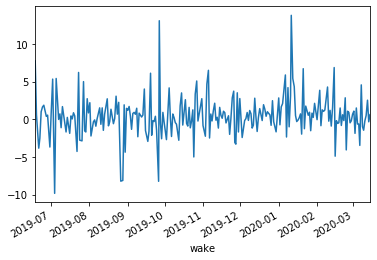

In [353]:
# Plot the raw result!
timediffhours.plot()

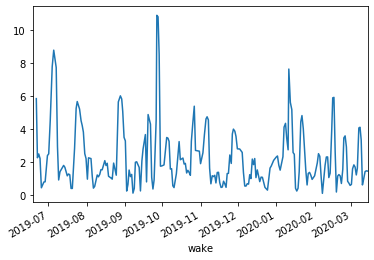

In [354]:
# Plot rolling standard deviation (over 3 days)
timediffhours.rolling(3).std().plot()

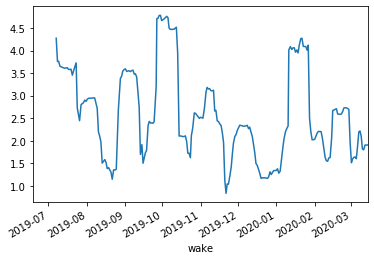

In [355]:
# Plot rolling standard deviation (over 15 days)
timediffhours.rolling(15).std().plot()

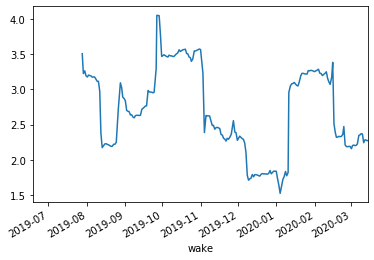

In [356]:
# Plot rolling standard deviation (over 31 days)
timediffhours.rolling(31).std().plot()

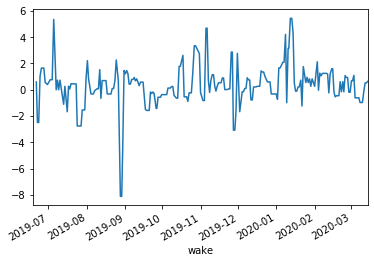

In [359]:
# Plot rolling median (over 3 days)
timediffhours.rolling(3).median().plot()

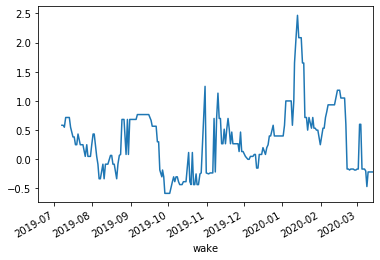

In [360]:
# Plot rolling median (over 15 days)
timediffhours.rolling(15).median().plot()

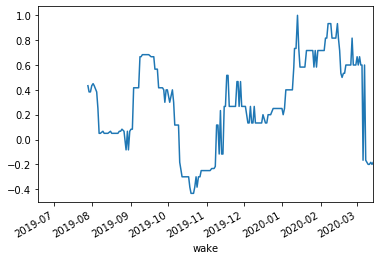

In [361]:
# Plot rolling median (over 31 days)
timediffhours.rolling(31).median().plot()

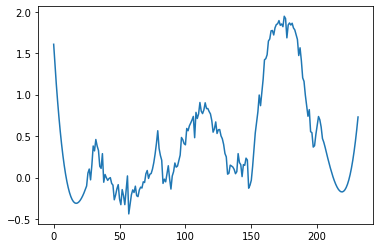

In [362]:
# Plot smoothed signal using a savgol filter
from scipy.signal import savgol_filter
yhat = savgol_filter(timediffhours, 51, 3) # window size 51, polynomial order 3
plt.plot(yhat)

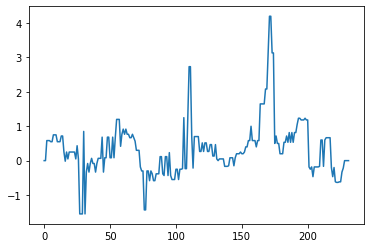

In [363]:
# Plot with a median filter (from scipy)
from scipy.signal import medfilt
yhat = medfilt(timediffhours, 9)
plt.plot(yhat)

In [364]:
# Outliers? Hidden Naps (positive sign = sleep way later)?
timediffhours[timediffhours > 10]

wake
2019-09-26 13:10:00+00:00    13.083333
2020-01-10 22:45:00+00:00    13.800000
dtype: float64

In [365]:
# Outliers? Hidden naps again (negative sign = sleep way earlier)?
timediffhours[timediffhours < -10]

Series([], dtype: float64)

In [425]:
# Show descriptive stats, in hour format
print("The daily phase delay is %g hours at median and %g (varying +-%g) hours on average." % (timediffhours.median(), timediffhours.mean(), timediffhours.std()))  # median daily phase delay, in hours
timediffhours.describe()

The daily phase delay is 0.341667 hours at median and 0.438147 (varying +-2.78612) hours on average.


count    232.000000
mean       0.438147
std        2.786118
min       -9.833333
25%       -0.837500
50%        0.341667
75%        1.504167
max       13.800000
dtype: float64

In [424]:
# Show descriptive stats, in minutes format
print("The daily phase delay is %g minutes at median and %g (varying +-%g) minutes on average." % (timediff.median(), timediff.mean(), timediff.std()))  # median daily phase delay, in minutes
timediff.describe()

The daily phase delay is 20.5 minutes at median and 26.2888 (varying +-167.167) minutes on average.


count    232.000000
mean      26.288793
std      167.167097
min     -590.000000
25%      -50.250000
50%       20.500000
75%       90.250000
max      828.000000
dtype: float64

## Naps and sleep disruption analysis

Analyze the evolution of naps and sleep disruptions (holes), which are good indicators of sleep quality (the less holes and naps, the better sleep quality).

In [368]:
# Extract naps only
sleeplognaps = sleeplog_napsfixed[sleeplog_napsfixed['type_cleaned'] == 'NAP']
sleeplognaps

,bedtime,sleep,wake,duration,holes,type,dreams,aid,hindrances,tags,quality,notes,type_cleaned
3,2020-03-11 10:09:00+00:00,2020-03-11 10:25:00+00:00,2020-03-11 12:05:00+00:00,01:40:00,NaN,NAP,NIGHTMARE:-3,NONE,CUSTOM_0022|CUSTOM_0016,NONE,3,NaN,NAP
9,2020-03-06 08:51:00+00:00,2020-03-06 09:06:00+00:00,2020-03-06 11:41:00+00:00,02:35:00,NaN,NAP,NONE,NONE,NONE,NONE,5,NaN,NAP
19,2020-02-26 14:25:00+00:00,2020-02-26 14:30:00+00:00,2020-02-26 15:30:00+00:00,01:00:00,NaN,NAP,NONE,NONE,NONE,NONE,5,NaN,NAP
24,2020-02-22 10:50:00+00:00,2020-02-22 11:15:00+00:00,2020-02-22 12:15:00+00:00,01:00:00,NaN,NAP,NONE,NONE,CUSTOM_0007,NONE,5,NaN,NAP
32,2020-02-15 11:30:00+00:00,2020-02-15 11:45:00+00:00,2020-02-15 13:55:00+00:00,02:10:00,NaN,NAP,NONE,NONE,NONE,NONE,5,NaN,NAP
35,2020-02-13 10:25:00+00:00,2020-02-13 10:40:00+00:00,2020-02-13 11:30:00+00:00,00:50:00,NaN,NAP,NONE,NONE,ALARM_CLOCK,NONE,5,NaN,NAP
41,2020-02-08 07:53:00+00:00,2020-02-08 08:10:00+00:00,2020-02-08 09:10:00+00:00,01:00:00,NaN,NAP,NONE,NONE,NONE,NONE,5,NaN,NAP
42,2020-02-07 22:53:00+00:00,2020-02-07 23:08:00+00:00,2020-02-08 02:51:00+00:00,03:43:00,NaN,NIGHT_SLEEP,NONE,NONE,CUSTOM_0018|CUSTOM_0004,CUSTOM_0001|CUSTOM_0004|CUSTOM_0010,5,NaN,NAP
43,2020-02-07 09:45:00+00:00,2020-02-07 10:00:00+00:00,2020-02-07 14:35:00+00:00,04:35:00,NaN,NAP,NONE,NONE,CUSTOM_0018|CUSTOM_0004,CUSTOM_0008|CUSTOM_0010,5,NaN,NAP
49,2020-02-02 02:46:00+00:00,2020-02-02 03:01:00+00:00,2020-02-02 07:36:00+00:00,04:35:00,NaN,NAP,NONE,CUSTOM_0006|CUSTOM_0011,NONE,CUSTOM_0001|CUSTOM_0008|CUSTOM_0007|CUSTOM_0005,6,NaN,NAP


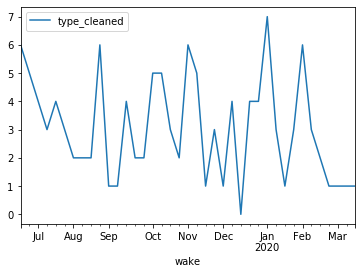

In [412]:
# Naps count evolution
sleeplognaps2 = sleeplognaps[['wake', 'type_cleaned']]
sleeplognaps2.loc[:, 'wake'] = pd.to_datetime(sleeplognaps2['wake'], utc=True)
napcount = sleeplognaps2.groupby([pd.Grouper(freq='W', key='wake')]).count()
# Remove first and last months because they have incomplete data
#napcount = napcount[1:-1]
napcount.plot()

In [413]:
napcount

,type_cleaned
wake,
2019-06-23 00:00:00+00:00,6
2019-06-30 00:00:00+00:00,5
2019-07-07 00:00:00+00:00,4
2019-07-14 00:00:00+00:00,3
2019-07-21 00:00:00+00:00,4
2019-07-28 00:00:00+00:00,3
2019-08-04 00:00:00+00:00,2
2019-08-11 00:00:00+00:00,2
2019-08-18 00:00:00+00:00,2


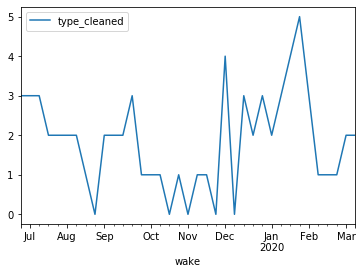

In [414]:
# Count number of nights with holes (sleep disruption)
holescount = sleeplognight.dropna(subset=['holes'])[['wake', 'type_cleaned']].groupby([pd.Grouper(freq='W', key='wake')]).count()
holescount = holescount[1:-1]
holescount.plot()

In [415]:
holescount

,type_cleaned
wake,
2019-06-30 00:00:00+00:00,3
2019-07-07 00:00:00+00:00,3
2019-07-14 00:00:00+00:00,3
2019-07-21 00:00:00+00:00,2
2019-07-28 00:00:00+00:00,2
2019-08-04 00:00:00+00:00,2
2019-08-11 00:00:00+00:00,2
2019-08-18 00:00:00+00:00,1
2019-08-25 00:00:00+00:00,0


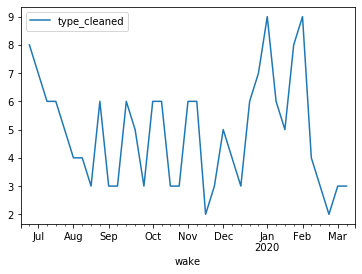

In [416]:
# Plot evolution of both naps and sleep disruptions (holes)
(napcount + holescount).plot()

In [417]:
(napcount + holescount)

,type_cleaned
wake,
2019-06-23 00:00:00+00:00,NaN
2019-06-30 00:00:00+00:00,8.0
2019-07-07 00:00:00+00:00,7.0
2019-07-14 00:00:00+00:00,6.0
2019-07-21 00:00:00+00:00,6.0
2019-07-28 00:00:00+00:00,5.0
2019-08-04 00:00:00+00:00,4.0
2019-08-11 00:00:00+00:00,4.0
2019-08-18 00:00:00+00:00,3.0


In [ ]:
# TODO: Split into periods given a list of start dates for the next period, and name them on graph with
# vertical lines to separate
